## Introduction

The process of Hotel Reservation Demand Analysis involves a systematic evaluation of the volume and patterns of hotel room bookings over a defined period. This analysis serves as a valuable tool for hotel management in understanding the demand for their rooms and predicting future trends. Utilizing this information, hotel management can make informed decisions regarding room pricing strategies, inventory management, and marketing initiatives to maximize revenue and enhance guest satisfaction.

The analysis takes into consideration various factors such as booking dates, duration of stay, room type, and market segment, allowing hotel management to identify areas of strength and potential areas for improvement in their operations. With the aid of data-driven insights, hotel management can implement effective measures to optimize revenue generation and guest satisfaction.

# Importing Libraries

In [66]:
# data
import pandas as pd
import numpy as np
import copy


# models
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# viusalization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import plot
from wordcloud import WordCloud
from PIL import Image


# DATA OVERVIEW

In [67]:
 df = pd.read_csv(r"/content/Hotel Reservations.csv")


In [68]:
 df_copy = copy.copy(df)

In [69]:
print("shape of dataset :",df_copy.shape)
df_copy.head()


shape of dataset : (36275, 19)


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [70]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [71]:
df.duplicated().sum()

0

In [72]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [73]:
cat_df = df_copy.select_dtypes(include='object')
for column in cat_df.columns:
    sub_categories = cat_df[column].value_counts()
    print(f"Sub categories for {column}: \n{sub_categories}\n")

Sub categories for Booking_ID: 
INN00001    1
INN24187    1
INN24181    1
INN24182    1
INN24183    1
           ..
INN12086    1
INN12085    1
INN12084    1
INN12083    1
INN36275    1
Name: Booking_ID, Length: 36275, dtype: int64

Sub categories for type_of_meal_plan: 
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64

Sub categories for room_type_reserved: 
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

Sub categories for market_segment_type: 
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64

Sub categories for booking_status: 
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64



The given dataset comprises 36,275 observations and 19 variables, totaling 689,225 values. There is no null values or duplicates. The large volume of data is advantageous for constructing a robust model. However, it is noteworthy that the "Booking_ID" column features unique values for each observation and therefore holds no predictive power, but could potentially decrease model efficiency. Hence, it is recommended to remove the "Booking_ID" column.

In [74]:
df_copy.drop("Booking_ID" , axis = 1 , inplace = True)

In [75]:
cat = df_copy.select_dtypes(include=["object"]).columns

for i in cat:
  sub_categories = df[i].value_counts()
  print(sub_categories)

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64


In [76]:
df_copy.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

# VISUALIZATION

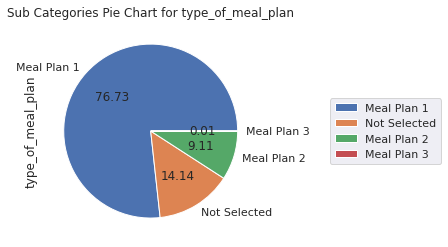

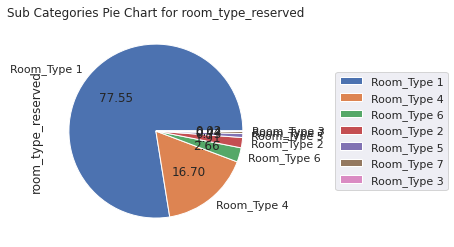

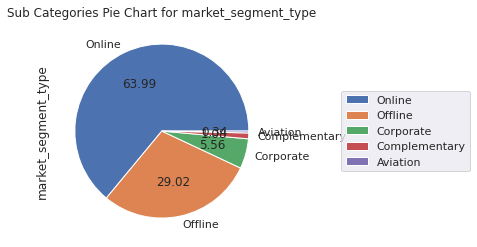

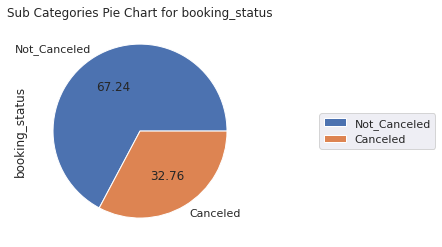

In [77]:
cat = df_copy.select_dtypes(include=["object"]).columns

for i in cat:
    sub_categories = df_copy[i].value_counts()
    sub_categories.plot(kind="pie", autopct="%.2f")
    plt.legend(sub_categories.index.tolist(), loc="center left", bbox_to_anchor=(1.3, 0.5))
    plt.title(f"Sub Categories Pie Chart for {i}")
    plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df_copy['type_of_meal_plan']=le.fit_transform(df_copy['type_of_meal_plan'])
df_copy['room_type_reserved']=le.fit_transform(df_copy['room_type_reserved'])
df_copy['market_segment_type']=le.fit_transform(df_copy['market_segment_type'])
df_copy['booking_status']=le.fit_transform(df_copy['booking_status'])


Applying label encoding to  prepare our categorical variables for further processing

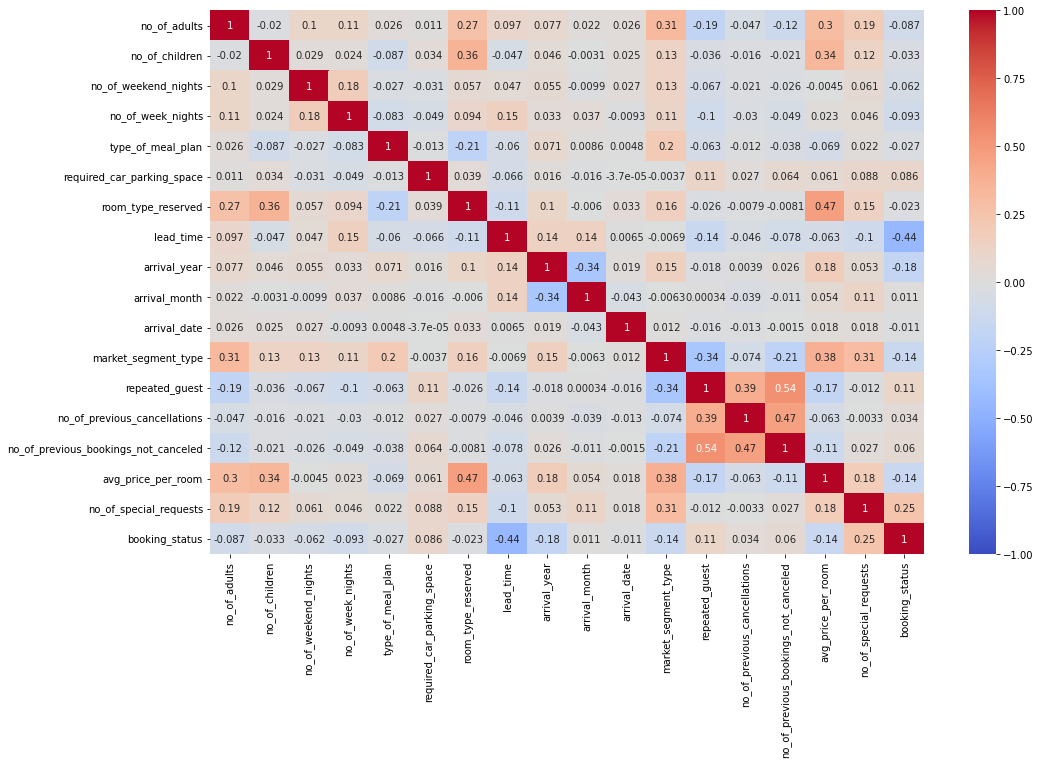

In [15]:
plt.figure(figsize=(16,10))
sns.heatmap(df_copy.corr(), annot=True, vmin=-1, vmax=1, cmap='coolwarm')

When examining our categorical variables, it is observed that the majority of reservations are made for rooms accommodating two adults without children. It can also be noted that the majority of reservations are for short-term stays, with few instances of long-term stays. Additionally, the majority of reservations have selected meal plan 1, and there is no requirement for a car space. The most frequently booked room types are types 1 and 4, and the majority of our data refers to bookings made in 2018.

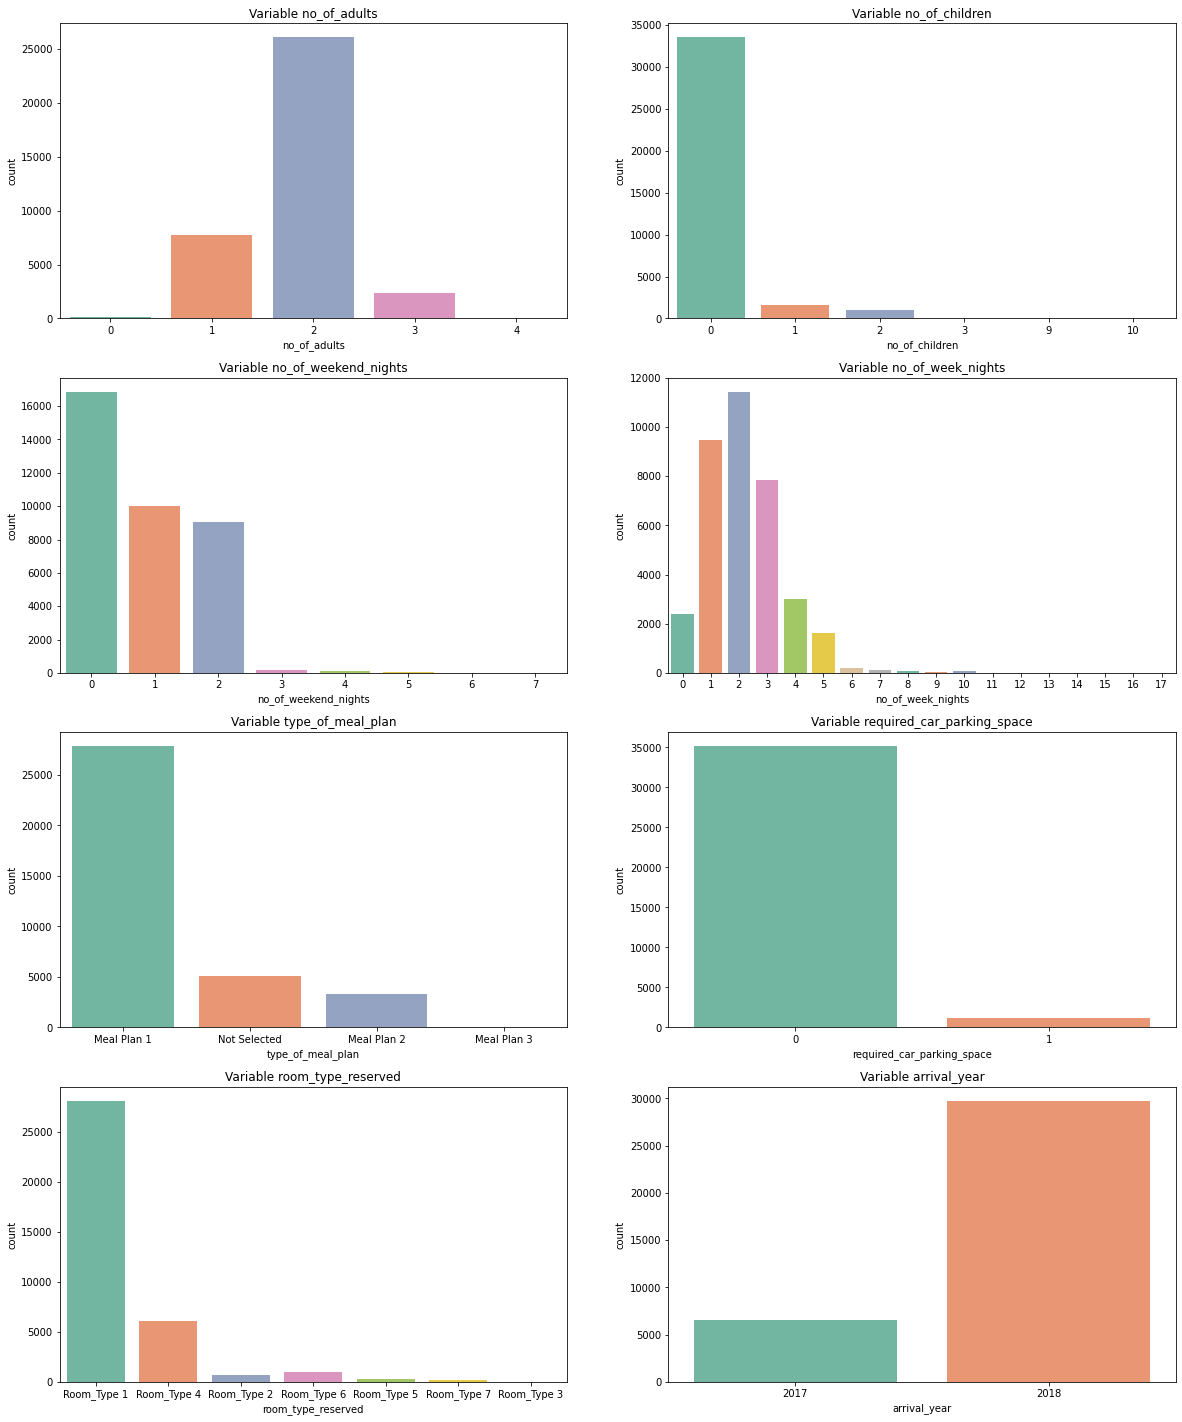

In [16]:
plt.figure(figsize = (20,25))

plt.subplot(4,2,1)
plt.gca().set_title('Variable no_of_adults')
sns.countplot(x = 'no_of_adults', palette = 'Set2', data = df)

plt.subplot(4,2,2)
plt.gca().set_title('Variable no_of_children')
sns.countplot(x = 'no_of_children', palette = 'Set2', data = df)

plt.subplot(4,2,3)
plt.gca().set_title('Variable no_of_weekend_nights')
sns.countplot(x = 'no_of_weekend_nights', palette = 'Set2', data = df)

plt.subplot(4,2,4)
plt.gca().set_title('Variable no_of_week_nights')
sns.countplot(x = 'no_of_week_nights', palette = 'Set2', data = df)

plt.subplot(4,2,5)
plt.gca().set_title('Variable type_of_meal_plan')
sns.countplot(x = 'type_of_meal_plan', palette = 'Set2', data = df)

plt.subplot(4,2,6)
plt.gca().set_title('Variable required_car_parking_space')
sns.countplot(x = 'required_car_parking_space', palette = 'Set2', data = df)

plt.subplot(4,2,7)
plt.gca().set_title('Variable room_type_reserved')
sns.countplot(x = 'room_type_reserved', palette = 'Set2', data = df)

plt.subplot(4,2,8)
plt.gca().set_title('Variable arrival_year')
sns.countplot(x = 'arrival_year', palette = 'Set2', data = df)

When analyzing the bookings by month, a noticeable trend can be observed. The number of bookings appears to increase gradually from January to October, then experience a drop in the months of November and December. Additionally, the majority of bookings are made online, and the majority of guests are first-time visitors to the hotel who have not previously cancelled a reservation. It is also noted that there is a decrease in available data as the number of special requests increases. Upon examination of the target variable, it can be seen that approximately 65% of reservations were not cancelled.# New Section

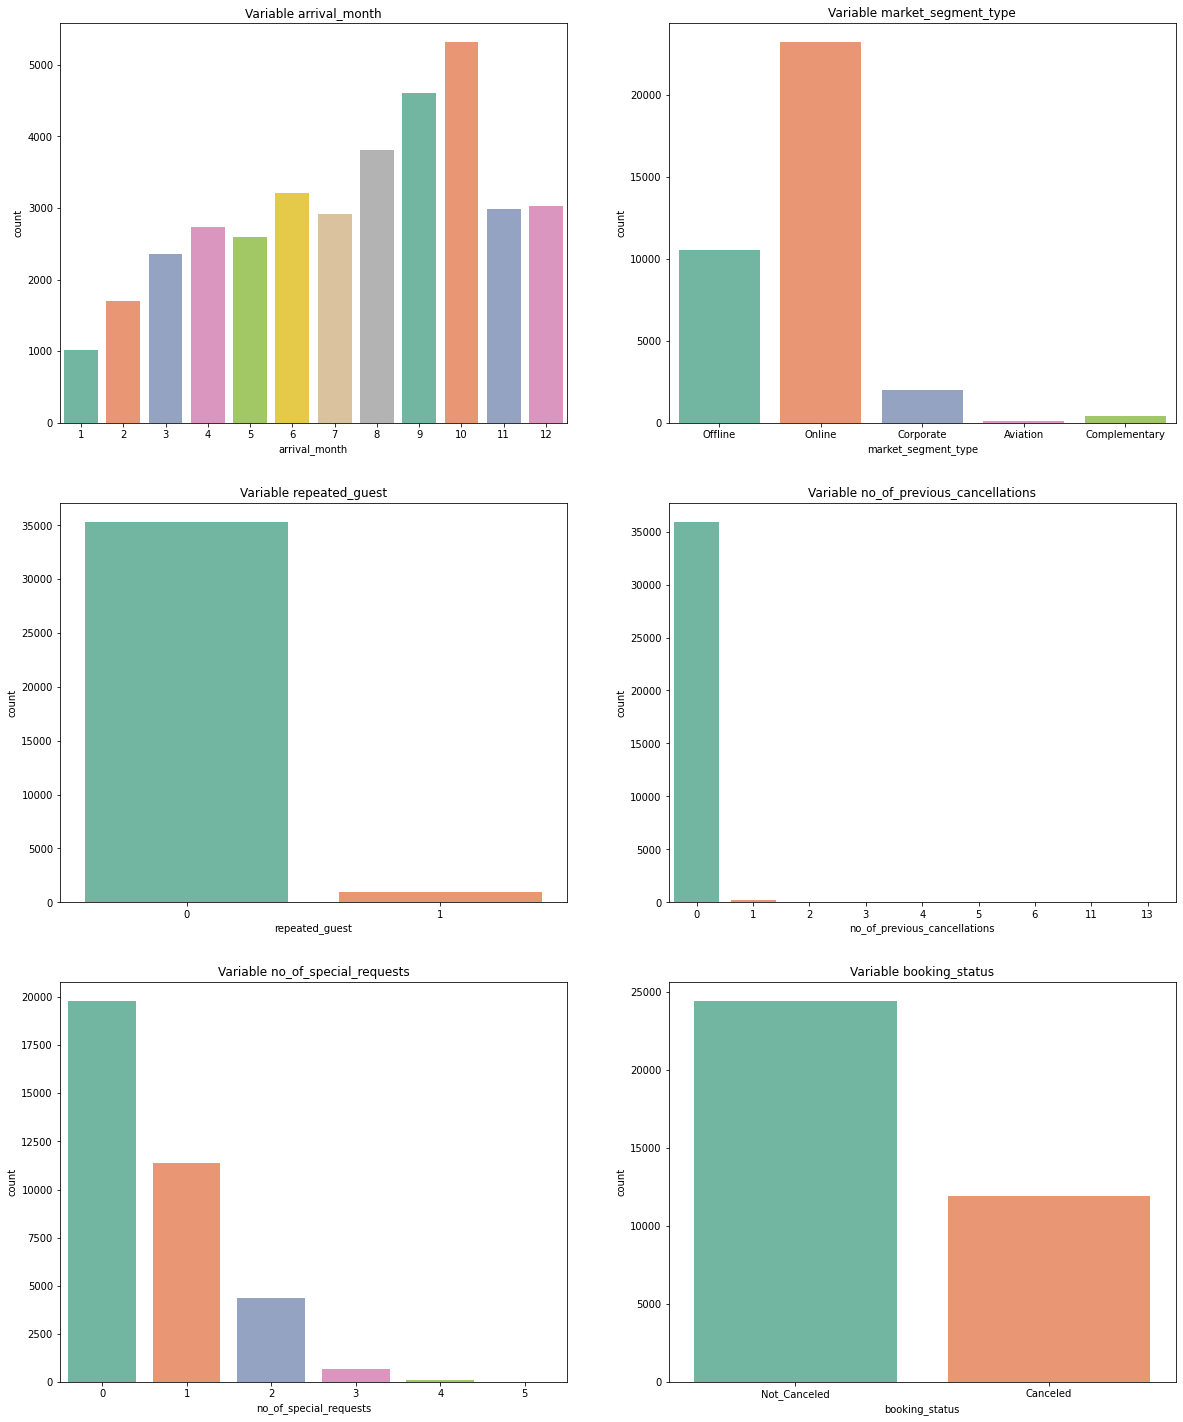

In [17]:
plt.figure(figsize = (20,25))

plt.subplot(3,2,1)
plt.gca().set_title('Variable arrival_month')
sns.countplot(x = 'arrival_month', palette = 'Set2', data = df)

plt.subplot(3,2,2)
plt.gca().set_title('Variable market_segment_type')
sns.countplot(x = 'market_segment_type', palette = 'Set2', data = df)

plt.subplot(3,2,3)
plt.gca().set_title('Variable repeated_guest')
sns.countplot(x = 'repeated_guest', palette = 'Set2', data = df)

plt.subplot(3,2,4)
plt.gca().set_title('Variable no_of_previous_cancellations')
sns.countplot(x = 'no_of_previous_cancellations', palette = 'Set2', data = df)

plt.subplot(3,2,5)
plt.gca().set_title('Variable no_of_special_requests')
sns.countplot(x = 'no_of_special_requests', palette = 'Set2', data = df)

plt.subplot(3,2,6)
plt.gca().set_title('Variable booking_status')
sns.countplot(x = 'booking_status', palette = 'Set2', data = df)

**continuous variables**

When considering our continuous variables, it can be noted that generally reservations are made within a short timeframe. As the time taken to make a reservation increases, the number of reservations decreases. It is also observed that the majority of data is centered around an average room price of 100 euros. Furthermore, it appears that guests typically have not cancelled reservations before.

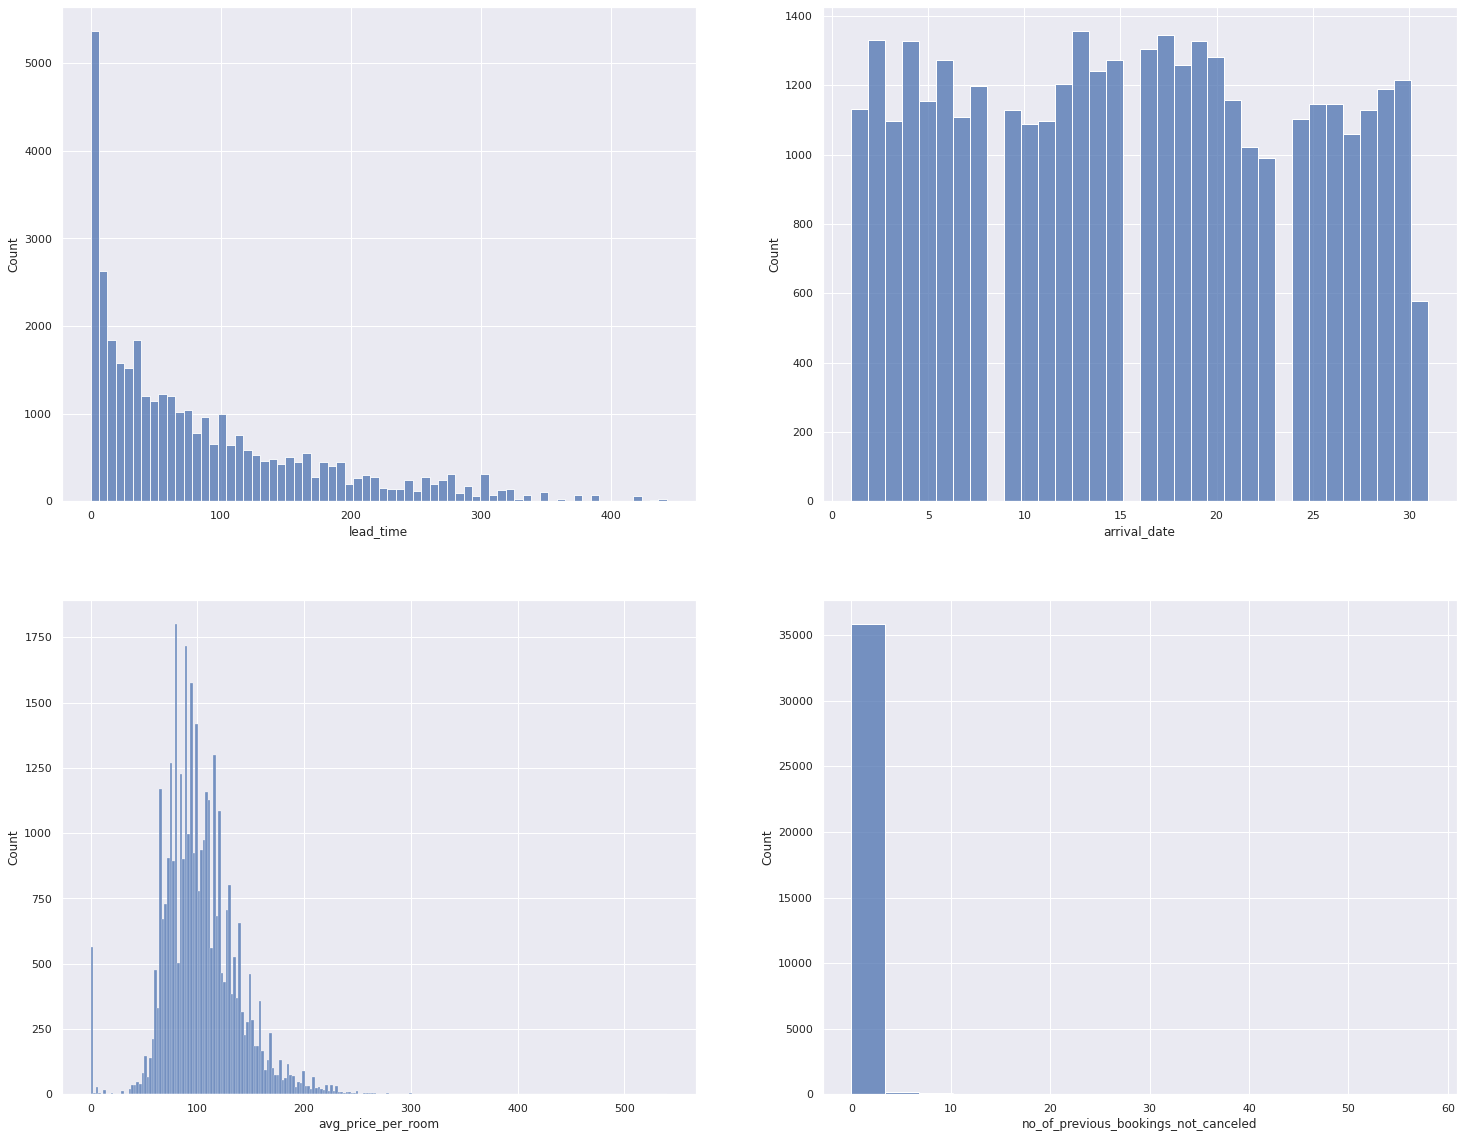

In [18]:
plt.figure(figsize = (25,20))
sns.set(color_codes = True)

plt.subplot(2,2,1)
sns.histplot(df['lead_time'], kde = False)

plt.subplot(2,2,2)
sns.histplot(df['arrival_date'], kde = False)

plt.subplot(2,2,3)
sns.histplot(df['avg_price_per_room'], kde = False)

plt.subplot(2,2,4)
sns.histplot(df['no_of_previous_bookings_not_canceled'], kde = False)

Bivariate Analysis
Looking at our target variable, we can have some insights, generally guests who request a parking space, guests who have stayed previously are guests who generally do not cancel the reservation, guests who request special requests are guests less likely to cancel, the more requests, the less probably, the biggest distortion we see here is the Lead_Time variable, the longer the person takes to book the room, the more likely they are to cancel, which makes a lot of sense, another interesting view is that in the final 3 months of the year we usually have less cancellations, despite being a slight incline, we can see that more expensive rooms may also experience more cancellations

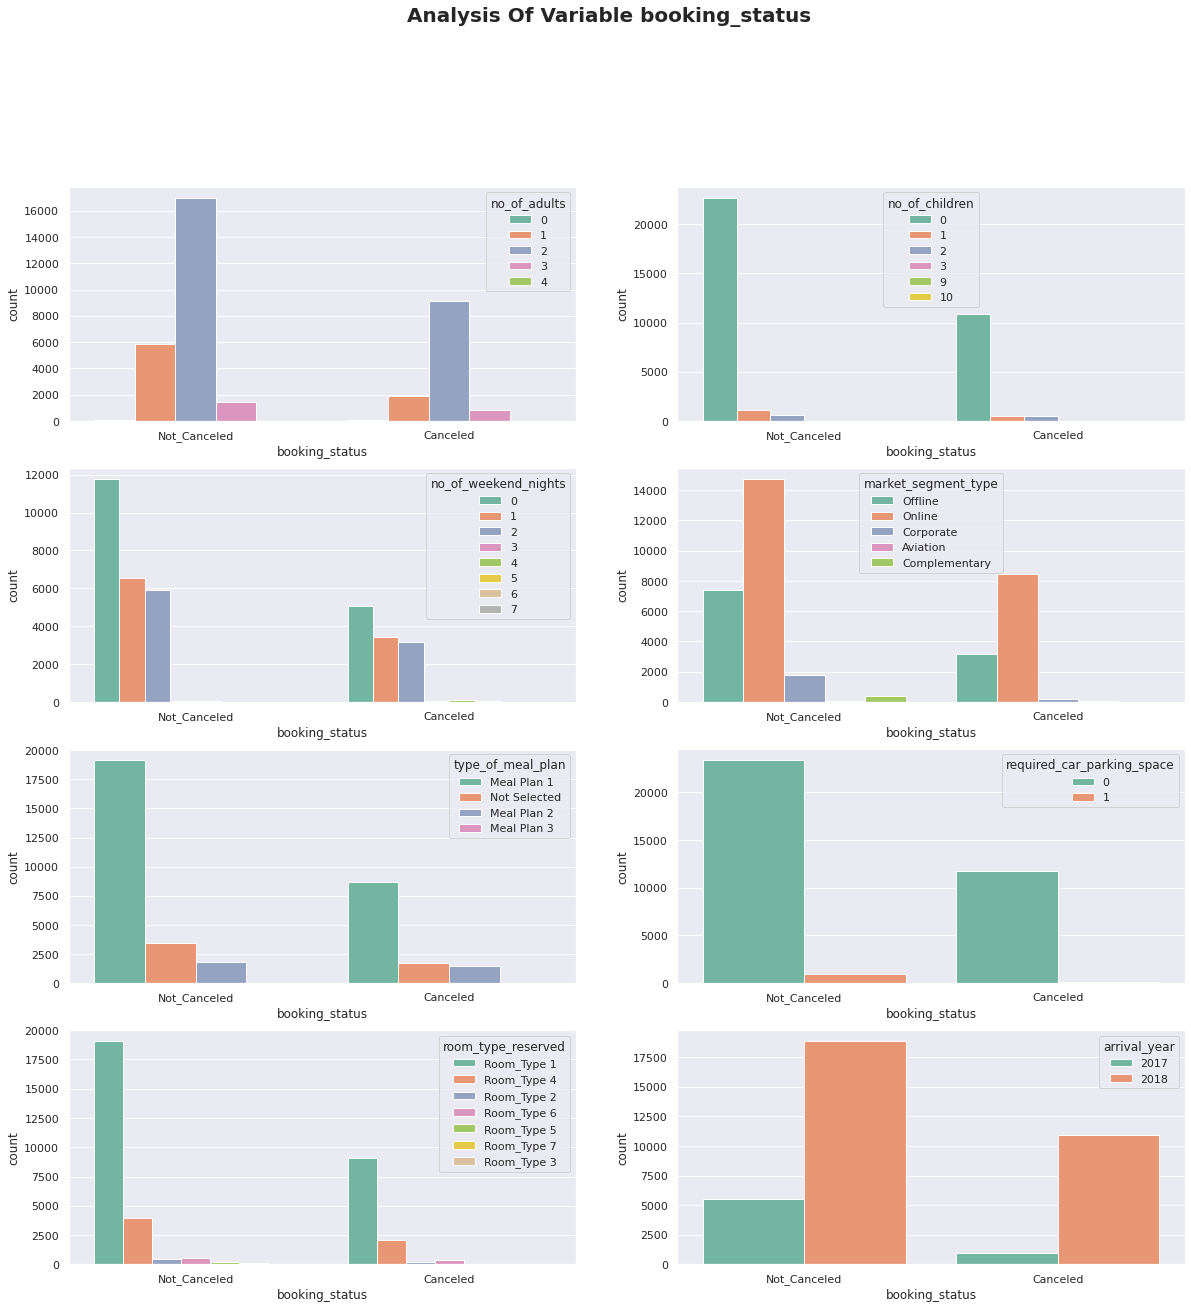

In [19]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable booking_status",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.countplot(x = 'booking_status', hue = 'no_of_adults', palette = 'Set2', data = df)

plt.subplot(5,2,2)
sns.countplot(x = 'booking_status', hue = 'no_of_children', palette = 'Set2', data = df)

plt.subplot(5,2,3)
sns.countplot(x = 'booking_status', hue = 'no_of_weekend_nights', palette = 'Set2', data = df)

plt.subplot(5,2,4)
sns.countplot(x = 'booking_status', hue = 'market_segment_type', palette = 'Set2', data = df)

plt.subplot(5,2,5)
sns.countplot(x = 'booking_status', hue = 'type_of_meal_plan', palette = 'Set2', data = df)

plt.subplot(5,2,6)
sns.countplot(x = 'booking_status', hue = 'required_car_parking_space', palette = 'Set2', data = df)

plt.subplot(5,2,7)
sns.countplot(x = 'booking_status', hue = 'room_type_reserved', palette = 'Set2', data = df)

plt.subplot(5,2,8)
sns.countplot(x = 'booking_status', hue = 'arrival_year', palette = 'Set2', data = df)

# MODEL BUILDING

In [20]:
X = df_copy.drop('booking_status', axis = 1)
X = X.values
y = df_copy['booking_status']


In [21]:

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [25]:
# Naive Bayes Classifier
model_0 = GaussianNB()
model_0.fit(X_train, y_train)
model_0 = model_0.predict(X_test)
print(classification_report(y_test, model_0))


              precision    recall  f1-score   support

           0       0.37      0.97      0.54      3574
           1       0.94      0.20      0.33      7309

    accuracy                           0.46     10883
   macro avg       0.66      0.59      0.44     10883
weighted avg       0.75      0.46      0.40     10883



In [26]:
 # K Nearest Neighbors Classifier
model_1 = KNeighborsClassifier()
model_1.fit(X_train , y_train)
model_1 = model_1.predict(X_test)
print(classification_report(y_test, model_1))

              precision    recall  f1-score   support

           0       0.74      0.62      0.67      3574
           1       0.83      0.90      0.86      7309

    accuracy                           0.80     10883
   macro avg       0.78      0.76      0.77     10883
weighted avg       0.80      0.80      0.80     10883



In [60]:
# Random forest Classifier
model_2 = RandomForestClassifier()
model_2.fit(X_train , y_train)
model_2 = model_2.predict(X_test)
print(classification_report(y_test, model_2))


              precision    recall  f1-score   support

           0       0.88      0.80      0.84      3574
           1       0.91      0.95      0.93      7309

    accuracy                           0.90     10883
   macro avg       0.90      0.88      0.88     10883
weighted avg       0.90      0.90      0.90     10883



In [28]:
# Logistic Regression Classifier
model_3 = LogisticRegression()
model_3.fit(X_train , y_train)
model_3 = model_3.predict(X_test)
print(classification_report(y_test, model_3))

              precision    recall  f1-score   support

           0       0.70      0.54      0.61      3574
           1       0.80      0.89      0.84      7309

    accuracy                           0.77     10883
   macro avg       0.75      0.72      0.73     10883
weighted avg       0.77      0.77      0.77     10883



In [29]:
#Support Vector Classification
model_4 = SVC()
model_4.fit(X_train , y_train)
model_4 = model_4.predict(X_test)
print(classification_report(y_test, model_4))

              precision    recall  f1-score   support

           0       0.75      0.42      0.54      3574
           1       0.77      0.93      0.84      7309

    accuracy                           0.76     10883
   macro avg       0.76      0.68      0.69     10883
weighted avg       0.76      0.76      0.74     10883



In [30]:
#XGBoost 
model_5 = xgb.XGBClassifier()
model_5.fit(X_train, y_train)
model_5 = model_5.predict(X_test)
print(classification_report(y_test, model_5))

              precision    recall  f1-score   support

           0       0.83      0.69      0.76      3574
           1       0.86      0.93      0.89      7309

    accuracy                           0.85     10883
   macro avg       0.85      0.81      0.82     10883
weighted avg       0.85      0.85      0.85     10883

